## Išvados

In [5]:
import pandas as pd
import numpy as np
import joblib
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

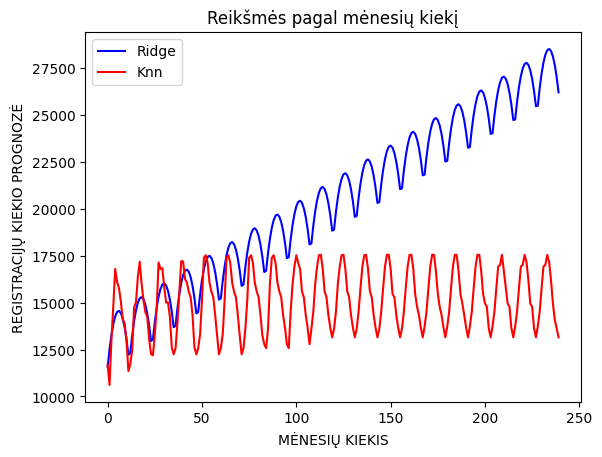

In [9]:
# FUNKCIJOS
# Funkcija prognozei gauti pagal vartotojo įvestis
def predict_kiekis(reg_year, reg_men, mod_nr):
    # Įkeliame PolynomialFeatures ir StandardScaler
    
    if mod_nr == 1:
    # # # variantas 1 Ridge
        poly = joblib.load('poly.pkl')
        scaler = joblib.load('scaler.pkl')
        loaded_model = joblib.load('regression_model.pkl')
    else:
    # # Geriausių parametrų variantas Knn
        poly = joblib.load('knn_poly.pkl')
        scaler = joblib.load('knn_scaler.pkl')
        loaded_model = joblib.load('knn_model.pkl')

    # Paruošiame duomenis
    user_data = pd.DataFrame({
        'PIRM_REG_METAI_LT': [reg_year],
        'PIRM_REG_MEN_LT': [reg_men]
    })

    # Pritaikom polynomial savybes ir normalizavimą
    user_data_poly = poly.transform(user_data)
    user_data_scaled = scaler.transform(user_data_poly)

    # Prognozuojam pagal užkrautą modelį
    predicted_vol = loaded_model.predict(user_data_scaled)
    return predicted_vol[0]

laikot = []
color_nr = ['black','blue', 'red' ]
model_label = [' ', 'Ridge', 'Knn']
mod_nr = 1

for x in range(1, 3):
    for i in range(2020, 2040):
        for j in range(1, 13):
            kiekis = int(predict_kiekis(i, j, x))
            laikot.append(kiekis)
    laik_df = pd.DataFrame(laikot)
    laikot = []
    plt.plot(laik_df, color=color_nr[x], label=model_label[x])

plt.ylabel('REGISTRACIJŲ KIEKIO PROGNOZĖ')
plt.xlabel('MĖNESIŲ KIEKIS')
plt.title('Reikšmės pagal mėnesių kiekį')
plt.legend()
plt.show()

<img src="grafikas.png" style="width:600px; float: left;"></img>


In [7]:
# RIDGE su daugiau hiperparametrų
# Treniravimo MSE: 2161648.8809042466
# Testavimo MSE: 2280778.784769369
# Treniravimo R2: 0.9219917887170379
# Testavimo R2: 0.9147456146115954
# Kryžminės validacijos (cv=5) R2 reikšmės: [0.91384052 0.89281415 0.93485942 0.93622549 0.91233234]
# Kryžminės validacijos (cv=5) vidutinis R2: 0.9180143854636891
# Kryžminės validacijos (cv=10) R2 reikšmės: [0.93199097 0.88405198 0.84386196 0.93256721 0.92877381 0.93672897
#  0.92990776 0.94116806 0.90684795 0.90926982]
# Kryžminės validacijos (cv=10) vidutinis R2: 0.9145168506030178
# 16929.497589880284

### Pagal treniravimo , testavimo parametrus ir modelio elgesį 
### pasirenkame Ridge regresijos modelį.
### 
### Tai bus tikslesnės prognozės nustatant 
### reikalingus žmogiškus ir techninius resursus
### ateityje.

In [8]:
## Visi modelių rezultatai tiesiogai priklauso nuo 
## naudojamų duomenų.
## Esant kitiems duomenims
## rezultatai gali labai skirtis